In [1]:
import networkx as nx
beta = { 

    "Ácido graxo": {
        "Acil-CoA": {"label": "Acil-CoA-sintetase"}
    },
    "Acil-CoA": {
        "trans-Δ²-Enoil-CoA": {"label": "Acil-CoA-desidrogenase"} # desidrogenação do Acil
        
    },
    "trans-Δ²-Enoil-CoA":{
        "B-hidroxiacil-CoA": {"label": "enoil-CoA-hidratase"}, # hidratação da trans
    },
    "B-hidroxiacil-CoA": {
        "B-cetoacil-CoA": {"label": "B-hidroxiacilCoA-desidrogenase"}, # desidrogenação da hidroxiacil
    },
    "B-cetoacil-CoA":{
        "Acetil-CoA":{"label": "acil-CoA-acetiltransferase"}, # catalisação
        "Acil-CoA":{"label": "acil-CoA-acetiltransferase"}
    }
}

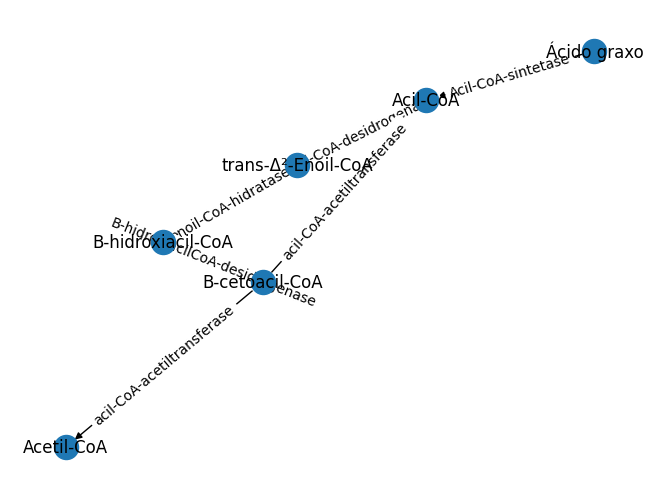

In [2]:
from random import randint

SEMENTE_ALEATORIA = randint(1, 100)

NOME_ROTULO = "label"
 
g = nx.DiGraph(beta)
 
posicao = nx.spring_layout(g, seed=SEMENTE_ALEATORIA)

nx.draw(g, with_labels=True, pos=posicao)
 
pesos = nx.get_edge_attributes(g, NOME_ROTULO)

nx.draw_networkx_edge_labels(g, posicao, edge_labels=pesos);

strict digraph "" {
	"Ácido graxo" -> "Acil-CoA"	[label="Acil-CoA-sintetase"];
	"Acil-CoA" -> "trans-Δ²-Enoil-CoA"	[label="Acil-CoA-desidrogenase"];
	"trans-Δ²-Enoil-CoA" -> "B-hidroxiacil-CoA"	[label="enoil-CoA-hidratase"];
	"B-hidroxiacil-CoA" -> "B-cetoacil-CoA"	[label="B-hidroxiacilCoA-desidrogenase"];
	"B-cetoacil-CoA" -> "Acil-CoA"	[label="acil-CoA-acetiltransferase"];
	"B-cetoacil-CoA" -> "Acetil-CoA"	[label="acil-CoA-acetiltransferase"];
}



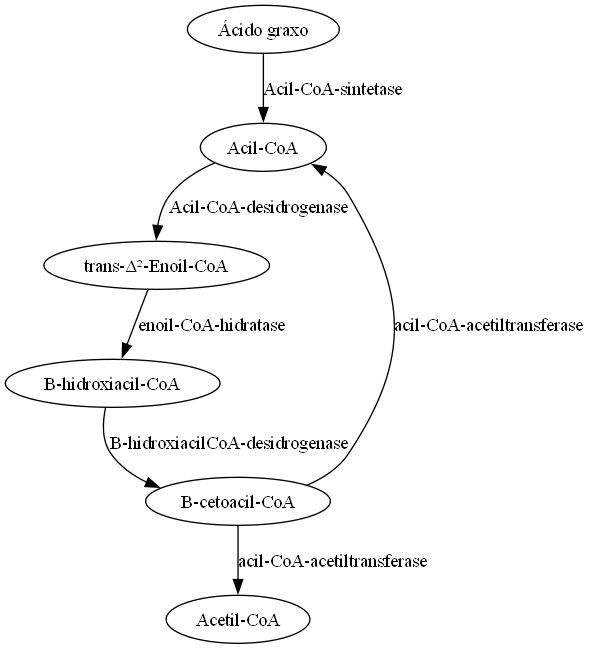

In [3]:
from networkx.drawing.nx_agraph import to_agraph
 
beta = to_agraph(g)
 
print(beta.to_string())
 
from IPython.display import Image, display
 
display(Image(beta.draw(format="png", prog="dot")))